In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE


In [3]:
# Load dataset (change path if needed)
path = "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(path)

# Count fraud (1) and non-fraud (0) cases
print(df['Class'].value_counts())

# Separate fraud and non fraud transactions
success_trans = df[df.Class == 0]  # Legitimate transactions
fraud_trans = df[df.Class == 1]    # Fraudulent transactions

# Reduce normal transactions for a balanced dataset
legit = success_trans.sample(n=1000, random_state=42)
df_balanced = pd.concat([legit, fraud_trans], axis=0)

# Define features and labels
X = df_balanced.drop("Class", axis=1)  # drop Class column beacuse it's not our input data
y = df_balanced["Class"]  # Target column or Output data (Fraud or Not)


Class
0    284315
1       492
Name: count, dtype: int64


In [4]:
# Split data into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)


In [5]:
# Apply SMOTE to generate more fraud cases
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)


In [6]:
# Train Random Forest with class weight to focus on fraud detection
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [7]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)


Accuracy: 0.9571
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       237
           1       0.99      0.89      0.94       136

    accuracy                           0.96       373
   macro avg       0.97      0.94      0.95       373
weighted avg       0.96      0.96      0.96       373



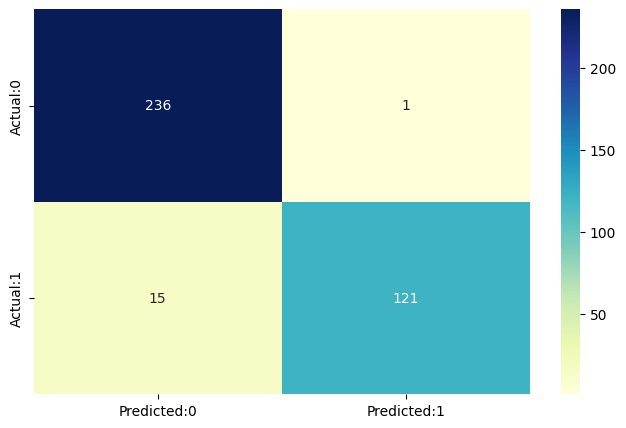

In [8]:
# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Print Classification Report (Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()


In [11]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [None, 10, 20],       # Depth of trees
    'min_samples_split': [2, 5, 10]    # Minimum data required to split a node
}

# Perform Grid Search to find the best model
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_smote, y_train_smote)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Train best model
best_rf_model.fit(X_train_smote, y_train_smote)

# Predict using the best model
y_pred_best = best_rf_model.predict(X_test)

# Print new Accuracy and Classification Report
print("Improved Model Results:")
print(classification_report(y_test, y_pred_best))





Improved Model Results:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       237
           1       0.99      0.89      0.94       136

    accuracy                           0.96       373
   macro avg       0.97      0.94      0.95       373
weighted avg       0.96      0.96      0.96       373



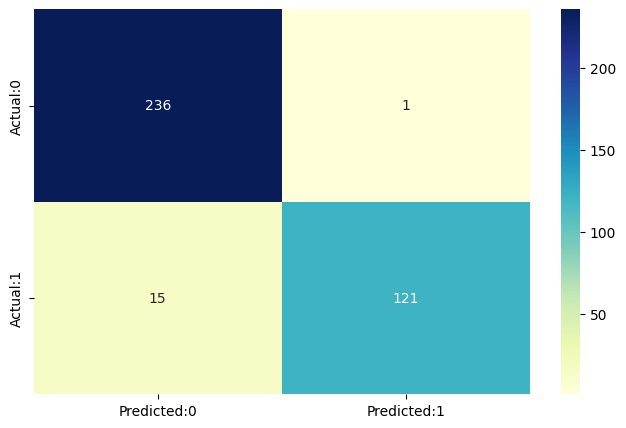

In [12]:
cm = confusion_matrix(y_test, y_pred_best)
conf_matrix = pd.DataFrame(cm, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()